# **Bank Data Analysis**

**Objectives**


*   encoding variables for the ML model.
*   Detect the outliers, and binning.
*   Visualize the results for comprehensive output.



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import zscore

# Data manupilation
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data vis
import seaborn as sns

# Model training & evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve,
    classification_report, accuracy_score, brier_score_loss, PrecisionRecallDisplay)
from sklearn.preprocessing import StandardScaler

# Model explainability
import shap

# Data augmentation
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Model calibration
from sklearn.isotonic import IsotonicRegression
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Handling warnings
import warnings
warnings.filterwarnings('ignore')

**Import DataSet**

In [2]:
#import dataset
#df will be used for training
df = pd.read_csv("https://raw.githubusercontent.com/Timjini/datasets/refs/heads/main/train.csv",sep=';')
# test_df for testing
test_df=pd.read_csv("https://raw.githubusercontent.com/Timjini/datasets/refs/heads/main/test.csv",sep=';')

**Data Audit**



*   Handle missing data
*   Remove unwanted observations
*   Fix stractural errros
*   Manage Outliers



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# First raws of the Dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Shape of the DataSet
df.shape

(45211, 17)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
45206,False
45207,False
45208,False
45209,False


In [8]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [9]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0
day,0.0


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df[cat_col].nunique()
# df['month'].value_counts()

,0
job,12
marital,3
education,4
default,2
housing,2
loan,2
contact,3
month,12
poutcome,4
y,2


# **Encoding Category variable**


*   encore binary values to boolean (true/false) as integer 1 or 0
*   encode non ordinal variable with one-hot encode 'job', 'marital' 'education', 'contact', 'poutcome'
*   convert month from string "jan" to int 1..12





In [12]:
months_to_numbers = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

In [13]:
# binary
binary_cols = ['y', 'loan', 'default', 'housing']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

#One-Hot Encoding
# categorical
one_hot_encode_cols = ['job', 'marital', 'education', 'contact', 'poutcome']
df = pd.get_dummies(
    df,
    columns= one_hot_encode_cols,
    drop_first=True,
    dtype=int
)

# month might not be a modular encode specific to the dataset
df['month_int'] = df['month'].map(months_to_numbers)
df.drop(columns=['month'], inplace=True)
df.rename(columns={'month_int': 'month'}, inplace=True)

# Rename y to subscribed for clarity
df.rename(columns={"y": "subscribed"}, inplace=True)

In [14]:
df.head()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,1,0,0,1,5
1,44,0,29,1,0,5,151,1,-1,0,...,1,1,0,0,0,1,0,0,1,5
2,33,0,2,1,1,5,76,1,-1,0,...,0,1,0,0,0,1,0,0,1,5
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,1,0,0,1,5
4,33,0,1,0,0,5,198,1,-1,0,...,1,0,0,1,0,1,0,0,1,5


In [15]:
#check for null after encoding
df.isnull().sum()

,0
age,0
default,0
balance,0
housing,0
loan,0
day,0
duration,0
campaign,0
pdays,0
previous,0


In [16]:
#column types after encoding
cat_col_enc = [col for col in df.columns if df[col].dtype == 'object']
num_col_enc = [col for col in df.columns if df[col].dtype != 'object']
print("cat cols", cat_col_enc)
print("num cols", num_col_enc)


cat cols []
num cols ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'subscribed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_telephone', 'contact_unknown', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month']




---



# **Outliers**



*  Visualize outliers for better understanding
*   imputate, cap or delete depending on sensitivity of the data.



---



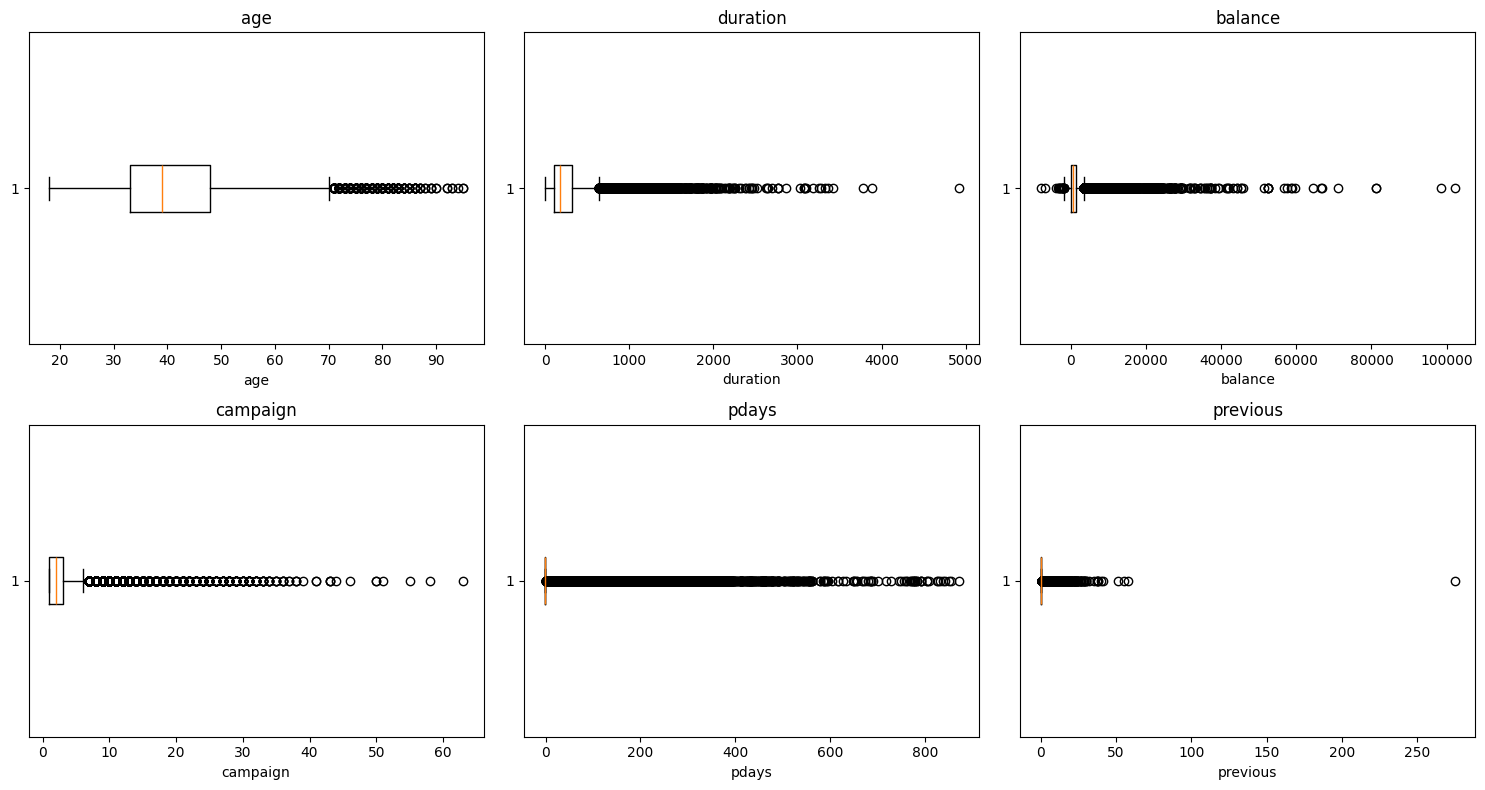

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,poutcome_other,poutcome_success,poutcome_unknown,month,age_outlier,duration_outlier,balance_outlier,campaign_outlier,pdays_outlier,previous_outlier
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,5,0,0,0,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,5,0,0,0,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,5,0,0,0,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,5,0,0,0,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,5,0,0,0,0,0,0


In [17]:

tem_col = ['age','duration','balance','campaign','pdays','previous']
n_cols = 3  # number of plots per row
n_plots = len(tem_col)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # make indexing easier

for i, col in enumerate(tem_col):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# IQR method flagged rows with 1 (can be removed)
for col in tem_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[f'{col}_outlier'] = ((df[col] < lower) | (df[col] > upper)).astype(int)
df.groupby('subscribed')[tem_col].mean()
df.head()



---



In [18]:
# Handling the outliers from above
# Drop rows where duration exceeded 1 hour 3600 seconds
df["duration"] = df["duration"].clip(upper=3600)

# imputation of over 20 campaigns
df["campaign"] = df["campaign"].clip(upper=20)

# 871 days are extreme outliers
df["pdays"] = df["pdays"].where(df["pdays"] <= 871, 871)

# Binning previous

df["previous_binned"] = pd.cut( df["previous"], bins=[-1, 0, 3, float("inf")], labels=["0", "1-3", "4+"] )
df = pd.get_dummies(
    df,
    columns=["previous_binned"],
    prefix="previous",
    drop_first=True
)

# drop original column
df = df.drop(columns=["previous"])

# Log transform  balance
df["balance_log"] = np.sign(df["balance"]) * np.log1p(np.abs(df["balance"]))
df = df.drop(columns=["balance"])

# Data description after outliers
df.describe()

,age,default,housing,loan,day,duration,campaign,pdays,subscribed,job_blue-collar,...,poutcome_success,poutcome_unknown,month,age_outlier,duration_outlier,balance_outlier,campaign_outlier,pdays_outlier,previous_outlier,balance_log
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,0.555838,0.160226,15.806419,258.123620,2.723496,40.197828,0.116985,0.215257,...,0.033421,0.817478,6.144655,0.010772,0.071553,0.104598,0.067771,0.182633,0.182633,4.887106
std,10.618762,0.133049,0.496878,0.366820,8.322476,256.935606,2.766887,100.128746,0.321406,0.411005,...,0.179735,0.386278,2.408034,0.103228,0.257750,0.306039,0.251356,0.386369,0.386369,3.807660
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.989694
25%,33.000000,0.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.290459
50%,39.000000,0.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.107023
75%,48.000000,0.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.264730
max,95.000000,1.000000,1.000000,1.000000,31.000000,3600.000000,20.000000,871.000000,1.000000,1.000000,...,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.533982


# **Exploratory Data Analysis**




Section objectives

*   Z-score confirmation of outlier control
*   Target-aware EDA
*   Model-ready features

In [19]:
# z-score confirmation
post_cleaning_num_cols = [
    "age", "day", "duration",
    "campaign", "pdays", "balance_log"
]
z_scores = df[post_cleaning_num_cols].apply(zscore)

z_outliers = (np.abs(z_scores) > 3)

z_outlier_counts = z_outliers.sum().sort_values(ascending=False)
z_outlier_counts

(z_outlier_counts / len(df) * 100).round(2)

,0
pdays,3.81
campaign,2.20
duration,2.15
age,0.84
balance_log,0.84
day,0.00


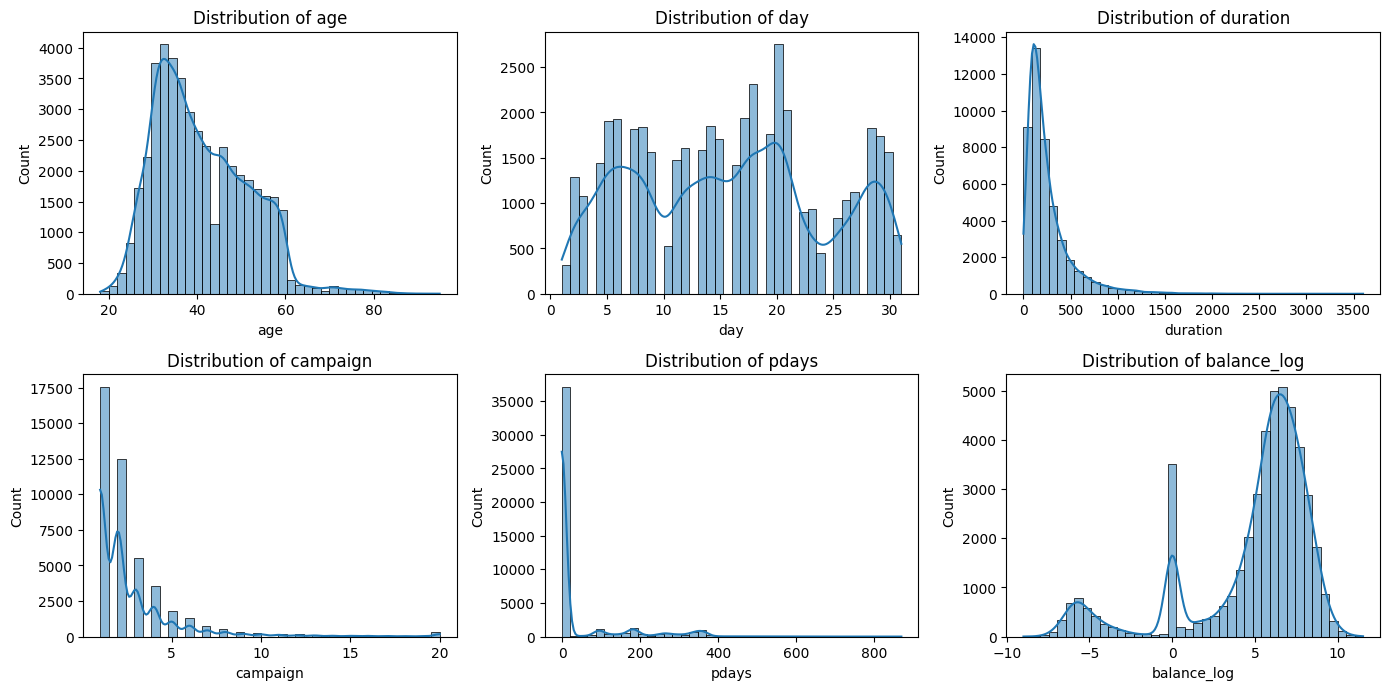

In [20]:
# Visualize main numerical variables
plt.figure(figsize=(14, 10))

for i, col in enumerate(post_cleaning_num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


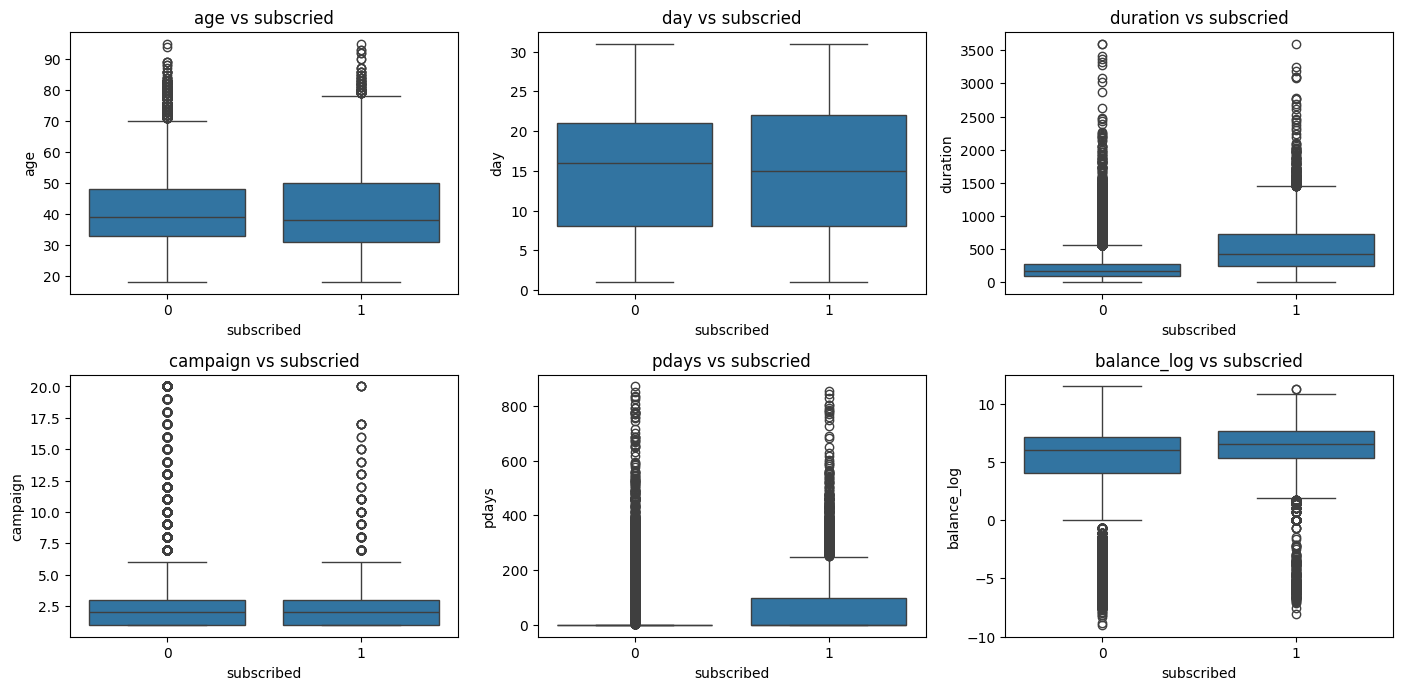

In [21]:
# explore data against subscription status "yes" , "no" to the term deposit
plt.figure(figsize=(14, 10))

for i, col in enumerate(post_cleaning_num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="subscribed", y=col, data=df)

    plt.title(f"{col} vs subscried")

plt.tight_layout()
plt.show()

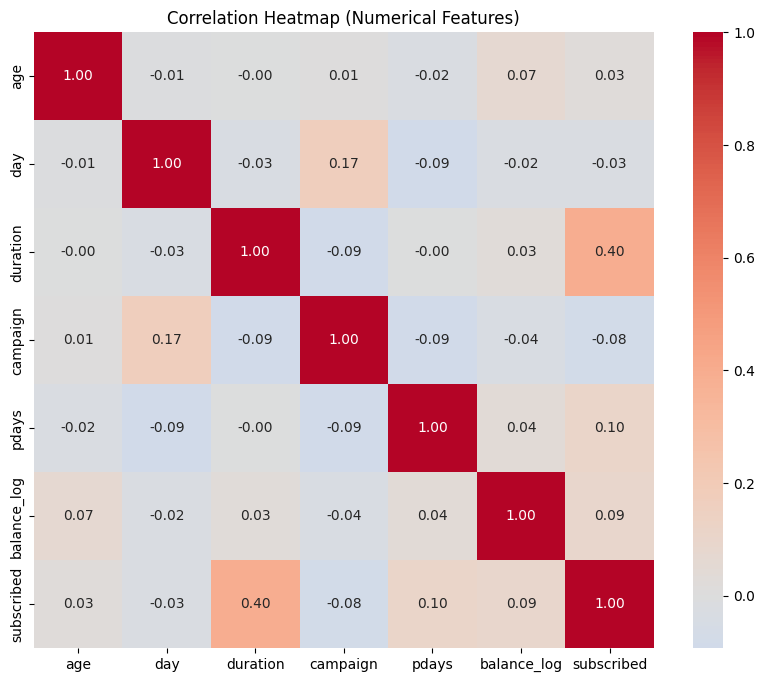

In [22]:
# Correlation heatmap against term deposit

plt.figure(figsize=(10, 8))

corr = df[post_cleaning_num_cols + ["subscribed"]].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [23]:
# Validate your outlier flags (sanity check)

outlier_flags = [
    "age_outlier", "duration_outlier", "balance_outlier",
    "campaign_outlier", "pdays_outlier", "previous_outlier"
]

df[outlier_flags].mean().sort_values(ascending=False)

,0
pdays_outlier,0.182633
previous_outlier,0.182633
balance_outlier,0.104598
duration_outlier,0.071553
campaign_outlier,0.067771
age_outlier,0.010772


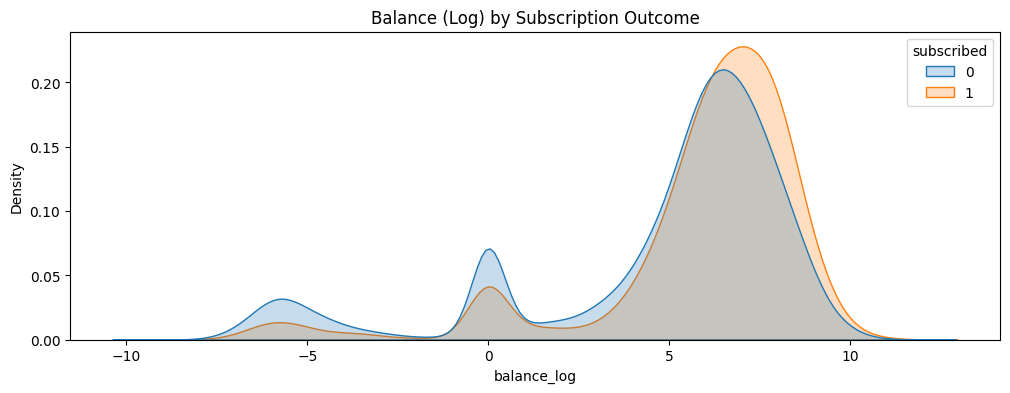

In [24]:
# KDE comparison (subscribed vs not)
plt.figure(figsize=(12, 4))

sns.kdeplot(
    data=df, x="balance_log", hue="subscribed",
    fill=True, common_norm=False
)

plt.title("Balance (Log) by Subscription Outcome")
plt.show()

# **Preparing Testing and Training Data**

In [39]:
# before models, safety checks
drop_cols = [
    "age_outlier", "duration_outlier", "balance_outlier",
    "campaign_outlier", "pdays_outlier", "previous_outlier"
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# 1. No object columns
df.select_dtypes(include="object").columns

# 2. Check ranges
df[["duration", "campaign", "pdays"]].describe()

# 3. Confirm no NaNs introduced
df.isna().sum().sort_values(ascending=False).head()


,0
age,0
default,0
housing,0
loan,0
day,0


In [40]:
# Preparing the data for training and test
X = df.drop(columns='subscribed')
y = df['subscribed']

# spliting sets to training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Train Set split: {y_train.value_counts()}')
print(f'\nTest Set split: {y_test.value_counts()}')

# Tag names to be used in the fitting
target_names = ['Not Subscribed', 'Subscribed']

Train Set split: subscribed
0    31937
1     4231
Name: count, dtype: int64

Test Set split: subscribed
0    7985
1    1058
Name: count, dtype: int64


# **Random Forest**


In [41]:
rf_model = RandomForestClassifier(
    n_estimators = 300,
    max_depth = 10,
    class_weight = 'balanced',
    random_state = 42
)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

print(f'\nClassification Report:\n {classification_report(y_test, y_pred , target_names=target_names)}\n\n')


Classification Report:
                 precision    recall  f1-score   support

Not Subscribed       0.97      0.85      0.91      7985
    Subscribed       0.42      0.83      0.56      1058

      accuracy                           0.84      9043
     macro avg       0.70      0.84      0.73      9043
  weighted avg       0.91      0.84      0.86      9043





# **Gradient Boosting (Performance Model)**

In [45]:
# Initialize XGBoost (designed for 2026 performance)
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=7.5,
    random_state=42
)

# Fit and Predict
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Compare this output to your RF output
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=target_names))


XGBoost Classification Report:
                precision    recall  f1-score   support

Not Subscribed       0.98      0.87      0.92      7985
    Subscribed       0.46      0.86      0.60      1058

      accuracy                           0.86      9043
     macro avg       0.72      0.86      0.76      9043
  weighted avg       0.92      0.86      0.88      9043



# **Comparing Models**

In [49]:
# comparing models
# random forest
print("Random Forest =========================")
accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))



# Xgboost
print("XGBoost =========================")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=target_names))


Random Forest =========================
Accuracy: 0.84
Confusion Matrix:
[[6753 1232]
 [ 175  883]]
Classification Report:
                precision    recall  f1-score   support

Not Subscribed       0.97      0.85      0.91      7985
    Subscribed       0.42      0.83      0.56      1058

      accuracy                           0.84      9043
     macro avg       0.70      0.84      0.73      9043
  weighted avg       0.91      0.84      0.86      9043

XGBoost =========================
Accuracy: 0.86
Confusion Matrix:
[[6910 1075]
 [ 151  907]]
Classification Report:
                precision    recall  f1-score   support

Not Subscribed       0.98      0.87      0.92      7985
    Subscribed       0.46      0.86      0.60      1058

      accuracy                           0.86      9043
     macro avg       0.72      0.86      0.76      9043
  weighted avg       0.92      0.86      0.88      9043



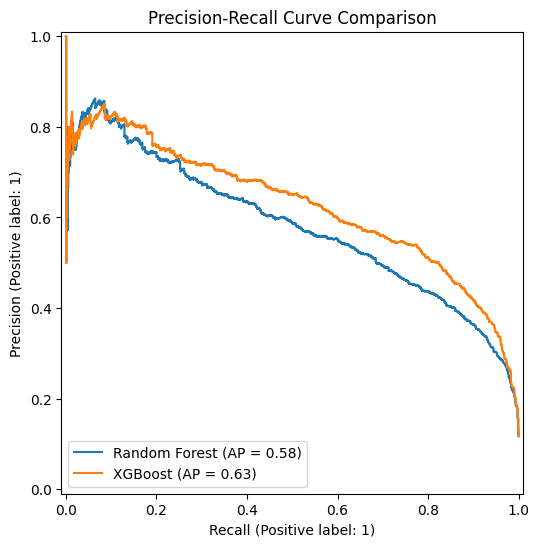

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

PrecisionRecallDisplay.from_estimator(
    rf_model,
    X_test_scaled,
    y_test,
    ax=ax,
    name="Random Forest"
)

PrecisionRecallDisplay.from_estimator(
    xgb_model,
    X_test_scaled,
    y_test,
    ax=ax,
    name="XGBoost"
)

plt.title("Precision-Recall Curve Comparison")
plt.show()


In [35]:

def model_metrics(y_test, y_pred, heatmap_color, roc_curve_color, precision_recall_curve_color ):

  conf_matrix = confusion_matrix(y_test, y_pred)
  fpr, tpr, _ = roc_curve(y_test, y_proba)
  roc_auc = roc_auc_score(y_test, y_proba)
  precision, recall, _ = precision_recall_curve(y_test, y_proba)
  accuracy = accuracy_score(y_test, y_pred)

  print(f"Accuracy: {accuracy:.2f}")
  #visual
  plt.figure(figsize = (18, 5))
  plt.subplot(1, 3, 1)
  sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = heatmap_color)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  plt.subplot(1, 3, 2)
  plt.plot(fpr, tpr, label = f'AUC = {roc_auc:.2f}', color = roc_curve_color)
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid(True)

  plt.subplot(1, 3, 3)
  plt.plot(recall, precision, color= precision_recall_curve_color)
  plt.title('Precision-Recall Curve')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.grid(True)

  plt.tight_layout()
  plt.show()

Random Forest
Accuracy: 0.84


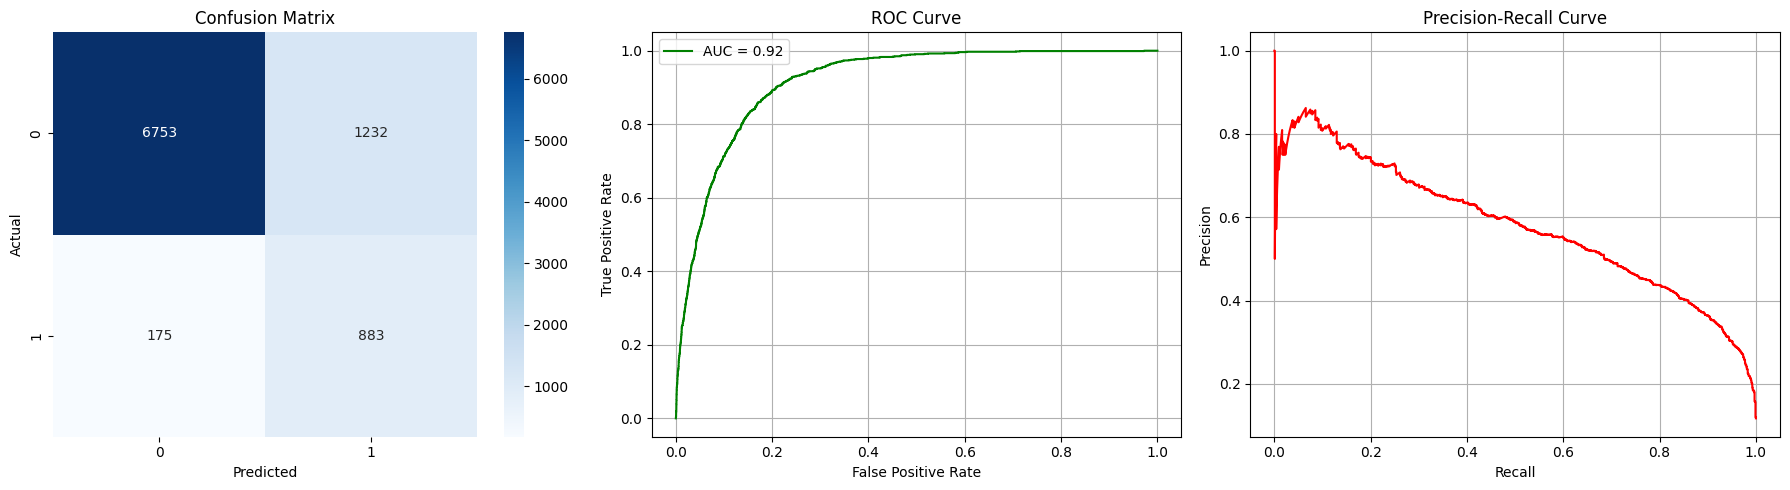

Gradient Boosting
Accuracy: 0.86


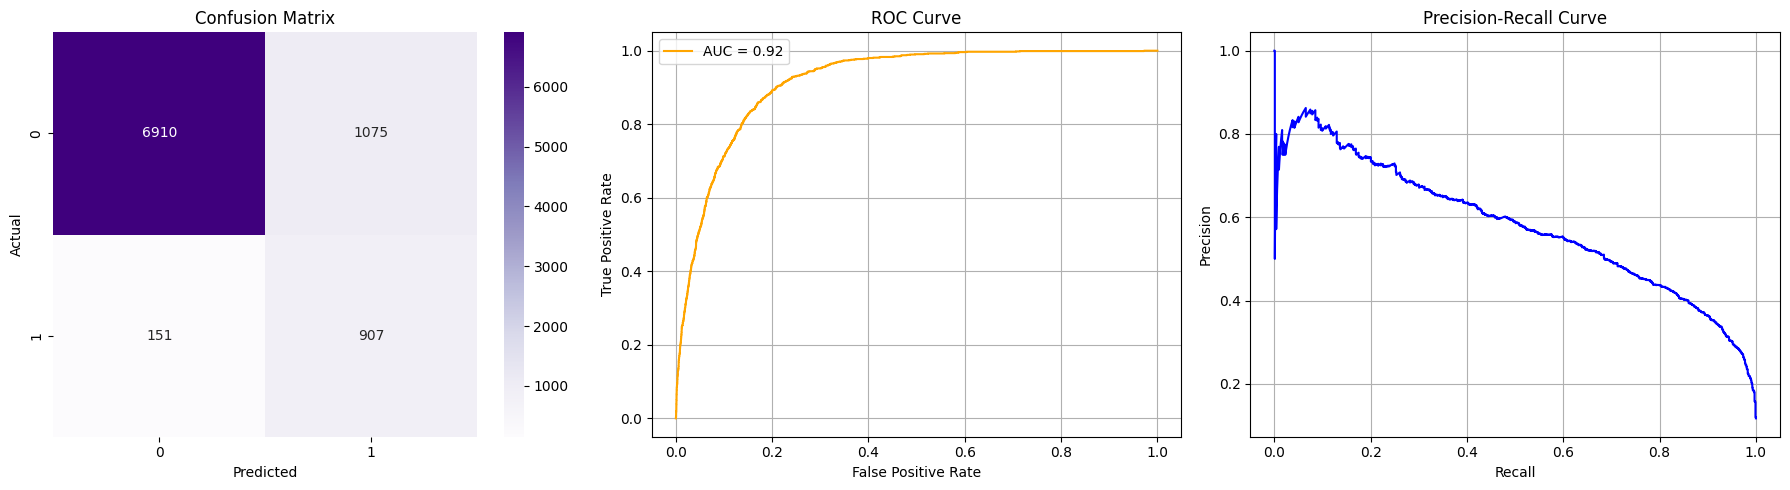

In [36]:
print("Random Forest")
model_metrics(y_test, y_pred, "Blues", 'green', 'red')
print("Gradient Boosting")
model_metrics(y_test, y_pred_xgb, "Purples", "orange", "blue")


In [ ]:
def lead_score_by_model(x_test, y_scores_raw):
  # Convert to a 1-100 Lead Score for easy business use
  lead_scores = (y_scores_raw * 100).round(1)

  # Create a prioritized dataframe
  results_df = pd.DataFrame({
      'Lead_Score': lead_scores,
      'Probability': y_scores_raw
  })

  # Add back original features (e.g., phone number, name if available)
  results_df = pd.concat([results_df, X_test.reset_index(drop=True)], axis=1)

  # Sort by highest score first
  prioritized_list = results_df.sort_values(by='Lead_Score', ascending=False)
  return prioritized_list

In [ ]:
rf_scores = lead_score_by_model(X_test, y_proba)
print("Random Forest Predictions")
rf_scores.head(5)

Random Forest Predictions


,Lead_Score,Probability,age,default,housing,loan,day,duration,campaign,pdays,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month,previous_1-3,previous_4+,balance_log
8605,95.8,0.957893,45,0,0,0,28,359,2,182,...,1,0,0,0,1,0,6,True,False,7.910224
7692,95.2,0.951738,47,0,0,0,5,432,3,97,...,0,0,0,0,1,0,8,True,False,6.551080
4459,95.0,0.949665,33,0,0,0,8,611,2,183,...,0,0,0,0,1,0,10,True,False,7.485492
7924,94.9,0.949288,74,0,0,0,25,400,1,173,...,0,0,0,0,1,0,10,True,False,6.841615
2700,94.7,0.946631,24,0,0,0,22,355,2,92,...,0,0,0,0,1,0,7,True,False,7.167038


In [ ]:
gbx_scores = lead_score_by_model(X_test, xgb_proba)
print("GBoosting Predictions")
gbx_scores.head(5)

GBoosting Predictions


,Lead_Score,Probability,age,default,housing,loan,day,duration,campaign,pdays,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month,previous_1-3,previous_4+,balance_log
4951,99.300003,0.992822,30,0,1,0,25,681,1,181,...,0,0,0,0,1,0,5,True,False,5.583496
8605,99.099998,0.990507,45,0,0,0,28,359,2,182,...,1,0,0,0,1,0,6,True,False,7.910224
7422,99.099998,0.990977,25,0,0,0,24,524,1,187,...,0,0,0,0,1,0,2,True,False,6.152733
7,99.000000,0.989838,64,0,0,0,23,706,1,225,...,0,0,0,0,1,0,6,True,False,4.700480
710,98.900002,0.989261,39,0,0,0,29,385,1,165,...,0,0,0,0,1,0,6,True,False,7.986165
